In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import os
from glob import glob

# === CONFIGURACIÓN ===
carpeta_entrada = r"IvsV_Pablo_290825"  # Cambia por tu ruta
carpeta_salida = os.path.join(carpeta_entrada, "graficas")

# Crear carpeta de salida si no existe
os.makedirs(carpeta_salida, exist_ok=True)

# Listar todos los .txt
archivos = glob(os.path.join(carpeta_entrada, "*.txt"))

print(f"Se encontraron {len(archivos)} archivos.")

# Lista para guardar resultados
resultados = []

# === PROCESAR CADA ARCHIVO ===
for archivo in archivos:
    try:
        # Leer archivo (sin headers, 9 columnas, tabulado)
        df = pd.read_csv(archivo, sep="\t", header=None)

        # Extraer columnas 2 y 4
        x = pd.to_numeric(df.iloc[:, 1], errors='coerce')
        y = pd.to_numeric(df.iloc[:, 3], errors='coerce')

        # Eliminar NaN
        mask = ~np.isnan(x) & ~np.isnan(y)
        x = x[mask].values
        y = y[mask].values

        if len(x) < 3:
            print(f"Archivo {archivo} omitido (datos insuficientes).")
            continue

        # Regresión lineal
        res = linregress(x, y)
        m = res.slope
        b = res.intercept
        SE_m = res.stderr
        SE_b = res.intercept_stderr
        r2 = res.rvalue**2

        # Guardar resultados en lista
        nombre_base = os.path.splitext(os.path.basename(archivo))[0]
        resultados.append({
            "archivo": nombre_base,
            "pendiente": m,
            "error_pendiente": SE_m,
            "intercepto": b,
            "error_intercepto": SE_b,
            "R2": r2
        })

        # Predicción para la recta
        x_pred = np.linspace(x.min(), x.max(), 100)
        y_pred = m * x_pred + b

        # === GRÁFICA ===
        plt.figure(figsize=(8, 5))
        plt.scatter(x, y, color='dodgerblue', alpha=0.7, label='Datos')
        plt.plot(x_pred, y_pred, color='red', linewidth=2, label='Regresión lineal')

        # Texto con ecuación, errores y R²
        ecuacion = (f"y = {m:.4f}x + {b:.4f}\n"
                    f"±({SE_m:.4f}, {SE_b:.4f})\n"
                    f"R² = {r2:.4f}")
        plt.text(0.02, 0.95, ecuacion, transform=plt.gca().transAxes,
                 fontsize=10, color='red', verticalalignment='top',
                 bbox=dict(facecolor='white', alpha=0.7))

        plt.xlabel('I (A)')
        plt.ylabel('V (V)')
        plt.title(f'Regresión Lineal: {nombre_base}')
        plt.legend(loc='lower right')
        plt.grid(True)

        # Guardar gráfica
        salida = os.path.join(carpeta_salida, f"{nombre_base}_regresion.png")
        plt.savefig(salida, dpi=300, bbox_inches='tight')
        plt.close()

        print(f"✅ Gráfica guardada: {salida}")

    except Exception as e:
        print(f"❌ Error procesando {archivo}: {e}")

# === GUARDAR RESUMEN EN CSV ===
df_resultados = pd.DataFrame(resultados)
csv_resumen = os.path.join(carpeta_salida, "resultados_regresiones.csv")
df_resultados.to_csv(csv_resumen, index=False)

print(f"\n📄 Archivo resumen guardado en: {csv_resumen}")
print(df_resultados.head())

Se encontraron 23 archivos.
✅ Gráfica guardada: IvsV_Pablo_290825/graficas/IvsV_Pablo_2probes_Vgate-1p0V_Vbias0p1mV_regresion.png
✅ Gráfica guardada: IvsV_Pablo_290825/graficas/IvsV_Pablo_2probes_Vgate-2p0V_Vbias0p1mV_regresion.png
✅ Gráfica guardada: IvsV_Pablo_290825/graficas/IvsV_Pablo_2probes_Vgate-3p0V_Vbias0p1mV_regresion.png
✅ Gráfica guardada: IvsV_Pablo_290825/graficas/IvsV_Pablo_2probes_Vgate0V_Vbias0p1mV_TEST_BLANK_regresion.png
✅ Gráfica guardada: IvsV_Pablo_290825/graficas/IvsV_Pablo_2probes_Vgate0_Vbias0p1mV_regresion.png
✅ Gráfica guardada: IvsV_Pablo_290825/graficas/IvsV_Pablo_2probes_Vgate0_Vbias0p2mV_regresion.png
✅ Gráfica guardada: IvsV_Pablo_290825/graficas/IvsV_Pablo_2probes_Vgate0_Vbias0p3mV_regresion.png
✅ Gráfica guardada: IvsV_Pablo_290825/graficas/IvsV_Pablo_2probes_Vgate0_Vbias0p4mV_regresion.png
✅ Gráfica guardada: IvsV_Pablo_290825/graficas/IvsV_Pablo_2probes_Vgate0_Vbias0p5mV_regresion.png
✅ Gráfica guardada: IvsV_Pablo_290825/graficas/IvsV_Pablo_2probes_

Se encontraron 9 archivos.


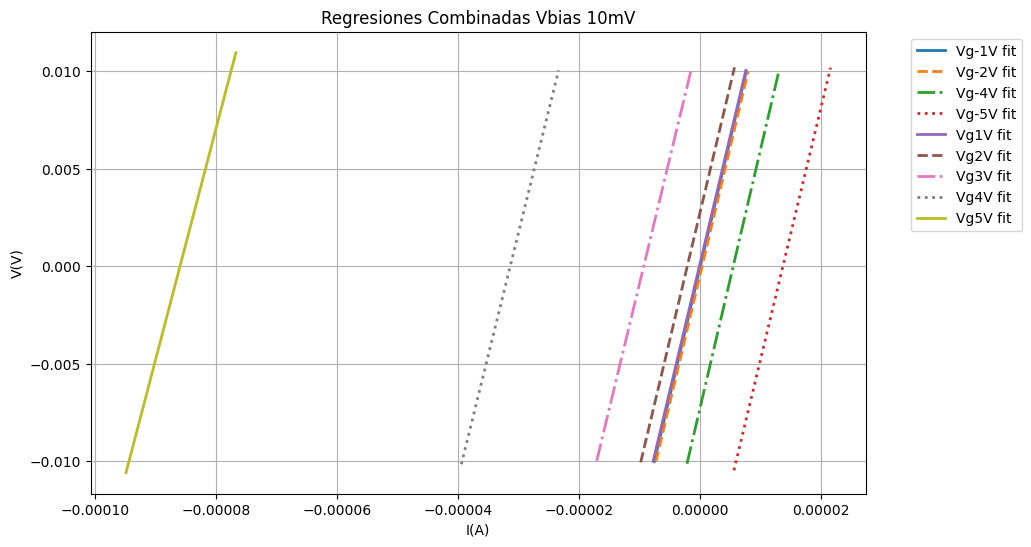


📊 Gráfica combinada guardada en: P/graficas/regresiones_combinadas.png
📄 Archivo resumen guardado en: P/graficas/resultados_regresiones.csv


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import os
from glob import glob
import itertools

# === CONFIGURACIÓN ===
carpeta_entrada = r"P"  # Cambia por tu ruta
carpeta_salida = os.path.join(carpeta_entrada, "graficas")

# Crear carpeta de salida si no existe
os.makedirs(carpeta_salida, exist_ok=True)

# Listar todos los .txt
archivos = glob(os.path.join(carpeta_entrada, "*.txt"))
print(f"Se encontraron {len(archivos)} archivos.")

# Lista para guardar resultados
resultados = []

# Colores y estilos de líneas (para diferenciar cada archivo)
colores = itertools.cycle(plt.cm.tab10.colors)
estilos = itertools.cycle(["-", "--", "-.", ":"])

# === FIGURA COMBINADA ===
plt.figure(figsize=(10, 6))

# === PROCESAR CADA ARCHIVO ===
for archivo in archivos:
    try:
        # Leer archivo
        df = pd.read_csv(archivo, sep="\t", header=None)

        # Extraer columnas 2 y 4
        x = pd.to_numeric(df.iloc[:, 1], errors='coerce')
        y = pd.to_numeric(df.iloc[:, 3], errors='coerce')

        # Eliminar NaN
        mask = ~np.isnan(x) & ~np.isnan(y)
        x = x[mask].values
        y = y[mask].values

        if len(x) < 3:
            print(f"Archivo {archivo} omitido (datos insuficientes).")
            continue

        # Regresión lineal
        res = linregress(x, y)
        m, b = res.slope, res.intercept
        SE_m, SE_b = res.stderr, res.intercept_stderr
        r2 = res.rvalue**2

        # Guardar resultados
        nombre_base = os.path.splitext(os.path.basename(archivo))[0]
        resultados.append({
            "archivo": nombre_base,
            "pendiente": m,
            "error_pendiente": SE_m,
            "intercepto": b,
            "error_intercepto": SE_b,
            "R2": r2
        })

        # Predicción de la recta
        x_pred = np.linspace(x.min(), x.max(), 100)
        y_pred = m * x_pred + b

        # Graficar solo la recta
        plt.plot(x_pred, y_pred, linestyle=next(estilos),
                 color=next(colores), linewidth=2,
                 label=f"{nombre_base} fit")

    except Exception as e:
        print(f"❌ Error procesando {archivo}: {e}")

# === CONFIG FINAL DE LA FIGURA COMBINADA ===
plt.xlabel("I(A)")
plt.ylabel("V(V)")
plt.title("Regresiones Combinadas Vbias 10mV")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # leyenda afuera
plt.grid(True)

# Guardar figura combinada
salida_combinada = os.path.join(carpeta_salida, "regresiones_combinadas.png")
plt.savefig(salida_combinada, dpi=300, bbox_inches='tight')
plt.show()

print(f"\n📊 Gráfica combinada guardada en: {salida_combinada}")

# === GUARDAR RESUMEN EN CSV ===
df_resultados = pd.DataFrame(resultados)
csv_resumen = os.path.join(carpeta_salida, "resultados_regresiones.csv")
df_resultados.to_csv(csv_resumen, index=False)

print(f"📄 Archivo resumen guardado en: {csv_resumen}")


Se encontraron 9 archivos.


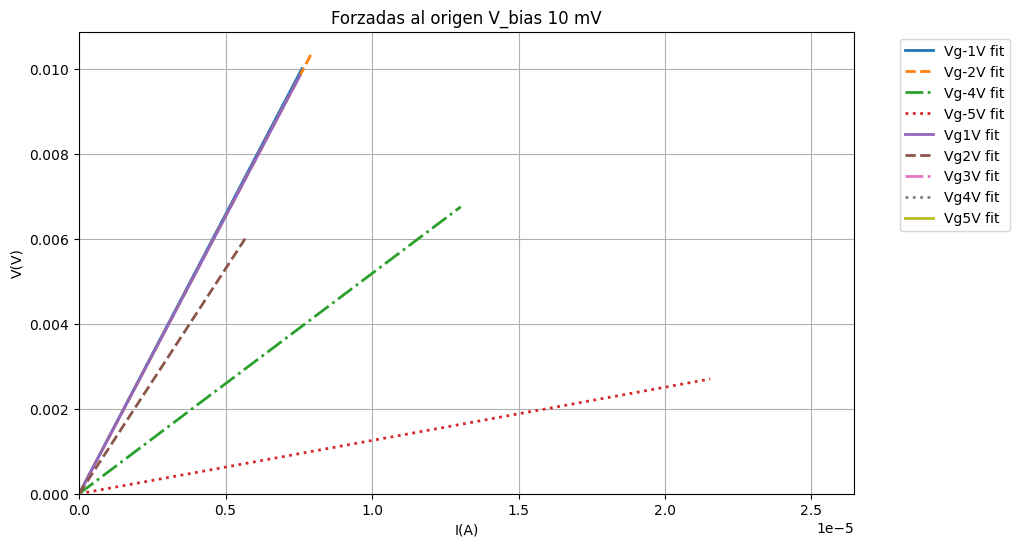


📊 Gráfica combinada guardada en: P/graficas/regresiones_forzadas_origen.png
📄 Archivo resumen guardado en: P/graficas/resultados_pendientes.csv


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from glob import glob
import itertools

# === CONFIGURACIÓN ===
carpeta_entrada = r"P"  # Cambia por tu ruta
carpeta_salida = os.path.join(carpeta_entrada, "graficas")

os.makedirs(carpeta_salida, exist_ok=True)

archivos = glob(os.path.join(carpeta_entrada, "*.txt"))
print(f"Se encontraron {len(archivos)} archivos.")

resultados = []

colores = itertools.cycle(plt.cm.tab10.colors)
estilos = itertools.cycle(["-", "--", "-.", ":"])

plt.figure(figsize=(10, 6))

for archivo in archivos:
    try:
        # Leer archivo
        df = pd.read_csv(archivo, sep="\t", header=None)

        # Extraer columnas 2 y 4
        x = pd.to_numeric(df.iloc[:, 1], errors='coerce')
        y = pd.to_numeric(df.iloc[:, 3], errors='coerce')

        # Eliminar NaN
        mask = ~np.isnan(x) & ~np.isnan(y)
        x = x[mask].values
        y = y[mask].values

        if len(x) < 3:
            print(f"Archivo {archivo} omitido (datos insuficientes).")
            continue

        # === Ajuste forzado al origen ===
        m = np.sum(x * y) / np.sum(x**2)

        # Error estándar de la pendiente
        residuals = y - m * x
        SE_m = np.sqrt(np.sum(residuals**2) / ((len(x) - 1) * np.sum(x**2)))

        # Guardar resultados
        nombre_base = os.path.splitext(os.path.basename(archivo))[0]
        resultados.append({
            "archivo": nombre_base,
            "pendiente": m,
            "error_pendiente": SE_m
        })

        # Recta ajustada (hasta donde llegan los datos)
        x_pred = np.linspace(0, x.max(), 100)
        y_pred = m * x_pred

        # Graficar solo la recta
        plt.plot(x_pred, y_pred, linestyle=next(estilos),
                 color=next(colores), linewidth=2,
                 label=f"{nombre_base} fit")

    except Exception as e:
        print(f"❌ Error procesando {archivo}: {e}")

# === Config final de la figura ===
plt.xlabel("I(A)")
plt.ylabel("V(V)")
plt.title("Forzadas al origen V_bias 10 mV")
plt.xlim(left=0)   # empieza en 0 en x
plt.ylim(bottom=0) # empieza en 0 en y
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

salida_combinada = os.path.join(carpeta_salida, "regresiones_forzadas_origen.png")
plt.savefig(salida_combinada, dpi=300, bbox_inches='tight')
plt.show()

print(f"\n📊 Gráfica combinada guardada en: {salida_combinada}")

# Guardar resultados en CSV
df_resultados = pd.DataFrame(resultados)
csv_resumen = os.path.join(carpeta_salida, "resultados_pendientes.csv")
df_resultados.to_csv(csv_resumen, index=False)

print(f"📄 Archivo resumen guardado en: {csv_resumen}")


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import os
from glob import glob

# === CONFIGURACIÓN ===
carpeta_entrada = r"OFET RvsVg/IvsV"  # Cambia por tu ruta
carpeta_salida = os.path.join(carpeta_entrada, "graficas")

# Crear carpeta de salida si no existe
os.makedirs(carpeta_salida, exist_ok=True)

# Listar todos los .txt
archivos = glob(os.path.join(carpeta_entrada, "*.txt"))

print(f"Se encontraron {len(archivos)} archivos.")

# Lista para guardar resultados
resultados = []

# === PROCESAR CADA ARCHIVO ===
for archivo in archivos:
    try:
        # Leer archivo (sin headers, 9 columnas, tabulado)
        df = pd.read_csv(archivo, sep="\t", header=None)

        # Extraer columnas 2 y 4
        x = pd.to_numeric(df.iloc[:, 1], errors='coerce')
        y = pd.to_numeric(df.iloc[:, 3], errors='coerce')

        # Eliminar NaN
        mask = ~np.isnan(x) & ~np.isnan(y)
        x = x[mask].values
        y = y[mask].values

        if len(x) < 3:
            print(f"Archivo {archivo} omitido (datos insuficientes).")
            continue

        # Regresión lineal
        res = linregress(x, y)
        m = res.slope
        b = res.intercept
        SE_m = res.stderr
        SE_b = res.intercept_stderr
        r2 = res.rvalue**2

        # Guardar resultados en lista
        nombre_base = os.path.splitext(os.path.basename(archivo))[0]
        resultados.append({
            "archivo": nombre_base,
            "pendiente": m,
            "error_pendiente": SE_m,
            "intercepto": b,
            "error_intercepto": SE_b,
            "R2": r2
        })

        # Predicción para la recta
        x_pred = np.linspace(x.min(), x.max(), 100)
        y_pred = m * x_pred + b

        # === GRÁFICA ===
        plt.figure(figsize=(8, 5))
        plt.scatter(x, y, color='dodgerblue', alpha=0.7, label='Datos')
        plt.plot(x_pred, y_pred, color='red', linewidth=2, label='Regresión lineal')

        # Texto con ecuación, errores y R²
        ecuacion = (f"y = {m:.4f}x + {b:.4f}\n"
                    f"±({SE_m:.4f}, {SE_b:.4f})\n"
                    f"R² = {r2:.4f}")
        plt.text(0.02, 0.95, ecuacion, transform=plt.gca().transAxes,
                 fontsize=10, color='red', verticalalignment='top',
                 bbox=dict(facecolor='white', alpha=0.7))

        plt.xlabel('I (A)')
        plt.ylabel('V (V)')
        plt.title(f'Regresión Lineal: {nombre_base}')
        plt.legend(loc='lower right')
        plt.grid(True)

        # Guardar gráfica
        salida = os.path.join(carpeta_salida, f"{nombre_base}_regresion.png")
        plt.savefig(salida, dpi=300, bbox_inches='tight')
        plt.close()

        print(f"✅ Gráfica guardada: {salida}")

    except Exception as e:
        print(f"❌ Error procesando {archivo}: {e}")

# === GUARDAR RESUMEN EN CSV ===
df_resultados = pd.DataFrame(resultados)
csv_resumen = os.path.join(carpeta_salida, "resultados_regresiones.csv")
df_resultados.to_csv(csv_resumen, index=False)

print(f"\n📄 Archivo resumen guardado en: {csv_resumen}")
print(df_resultados.head())

Se encontraron 5 archivos.
✅ Gráfica guardada: OFET RvsVg/IvsV/graficas/IvsV_Vbias_1mV_I_Vg0_Icompl_5mA_110925_regresion.png
✅ Gráfica guardada: OFET RvsVg/IvsV/graficas/IvsV_Vbias_1mV_I_Vg0_Icompl_5mA_After_Heating_110925-2_regresion.png
✅ Gráfica guardada: OFET RvsVg/IvsV/graficas/IvsV_Vbias_1mV_I_Vg0_Icompl_5mA_After_Heating_110925_Var_Isd_regresion.png
✅ Gráfica guardada: OFET RvsVg/IvsV/graficas/IvsV_Vbias_1mV_I_Vg0_Icompl_5mA_After_Heating_110925_Var_IsdSA2_5uA_regresion.png
✅ Gráfica guardada: OFET RvsVg/IvsV/graficas/IvsV_Vbias_1mV_I_Vg0_Icompl_5mA_Before_Heating_110925_regresion.png

📄 Archivo resumen guardado en: OFET RvsVg/IvsV/graficas/resultados_regresiones.csv
                                             archivo    pendiente  \
0             IvsV_Vbias_1mV_I_Vg0_Icompl_5mA_110925  3818.804257   
1  IvsV_Vbias_1mV_I_Vg0_Icompl_5mA_After_Heating_...   644.821877   
2  IvsV_Vbias_1mV_I_Vg0_Icompl_5mA_After_Heating_...     0.001553   
3  IvsV_Vbias_1mV_I_Vg0_Icompl_5mA_After_

Se encontraron 5 archivos.


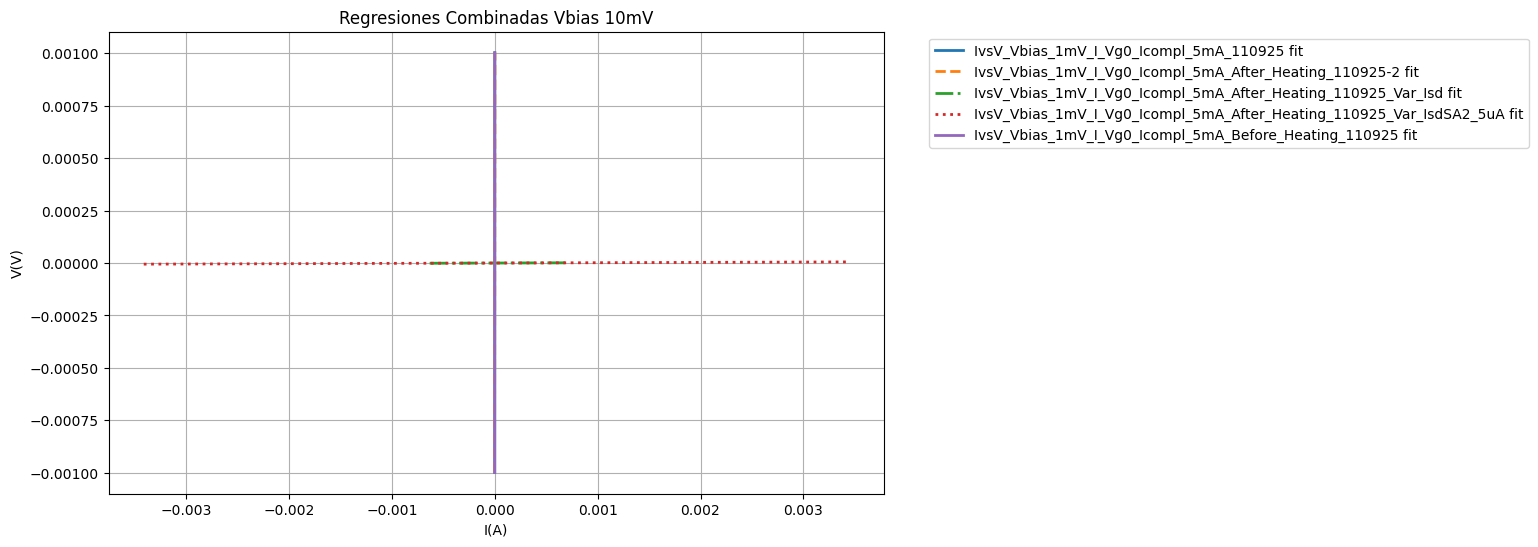


📊 Gráfica combinada guardada en: OFET RvsVg/IvsV/graficas/regresiones_combinadas.png
📄 Archivo resumen guardado en: OFET RvsVg/IvsV/graficas/resultados_regresiones.csv


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import os
from glob import glob
import itertools

# === CONFIGURACIÓN ===
carpeta_entrada = r"OFET RvsVg/IvsV"  # Cambia por tu ruta
carpeta_salida = os.path.join(carpeta_entrada, "graficas")

# Crear carpeta de salida si no existe
os.makedirs(carpeta_salida, exist_ok=True)

# Listar todos los .txt
archivos = glob(os.path.join(carpeta_entrada, "*.txt"))
print(f"Se encontraron {len(archivos)} archivos.")

# Lista para guardar resultados
resultados = []

# Colores y estilos de líneas (para diferenciar cada archivo)
colores = itertools.cycle(plt.cm.tab10.colors)
estilos = itertools.cycle(["-", "--", "-.", ":"])

# === FIGURA COMBINADA ===
plt.figure(figsize=(10, 6))

# === PROCESAR CADA ARCHIVO ===
for archivo in archivos:
    try:
        # Leer archivo
        df = pd.read_csv(archivo, sep="\t", header=None)

        # Extraer columnas 2 y 4
        x = pd.to_numeric(df.iloc[:, 1], errors='coerce')
        y = pd.to_numeric(df.iloc[:, 3], errors='coerce')

        # Eliminar NaN
        mask = ~np.isnan(x) & ~np.isnan(y)
        x = x[mask].values
        y = y[mask].values

        if len(x) < 3:
            print(f"Archivo {archivo} omitido (datos insuficientes).")
            continue

        # Regresión lineal
        res = linregress(x, y)
        m, b = res.slope, res.intercept
        SE_m, SE_b = res.stderr, res.intercept_stderr
        r2 = res.rvalue**2

        # Guardar resultados
        nombre_base = os.path.splitext(os.path.basename(archivo))[0]
        resultados.append({
            "archivo": nombre_base,
            "pendiente": m,
            "error_pendiente": SE_m,
            "intercepto": b,
            "error_intercepto": SE_b,
            "R2": r2
        })

        # Predicción de la recta
        x_pred = np.linspace(x.min(), x.max(), 100)
        y_pred = m * x_pred + b

        # Graficar solo la recta
        plt.plot(x_pred, y_pred, linestyle=next(estilos),
                 color=next(colores), linewidth=2,
                 label=f"{nombre_base} fit")

    except Exception as e:
        print(f"❌ Error procesando {archivo}: {e}")

# === CONFIG FINAL DE LA FIGURA COMBINADA ===
plt.xlabel("I(A)")
plt.ylabel("V(V)")
plt.title("Regresiones Combinadas Vbias 10mV")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # leyenda afuera
plt.grid(True)

# Guardar figura combinada
salida_combinada = os.path.join(carpeta_salida, "regresiones_combinadas.png")
plt.savefig(salida_combinada, dpi=300, bbox_inches='tight')
plt.show()

print(f"\n📊 Gráfica combinada guardada en: {salida_combinada}")

# === GUARDAR RESUMEN EN CSV ===
df_resultados = pd.DataFrame(resultados)
csv_resumen = os.path.join(carpeta_salida, "resultados_regresiones.csv")
df_resultados.to_csv(csv_resumen, index=False)

print(f"📄 Archivo resumen guardado en: {csv_resumen}")


Se encontraron 5 archivos.


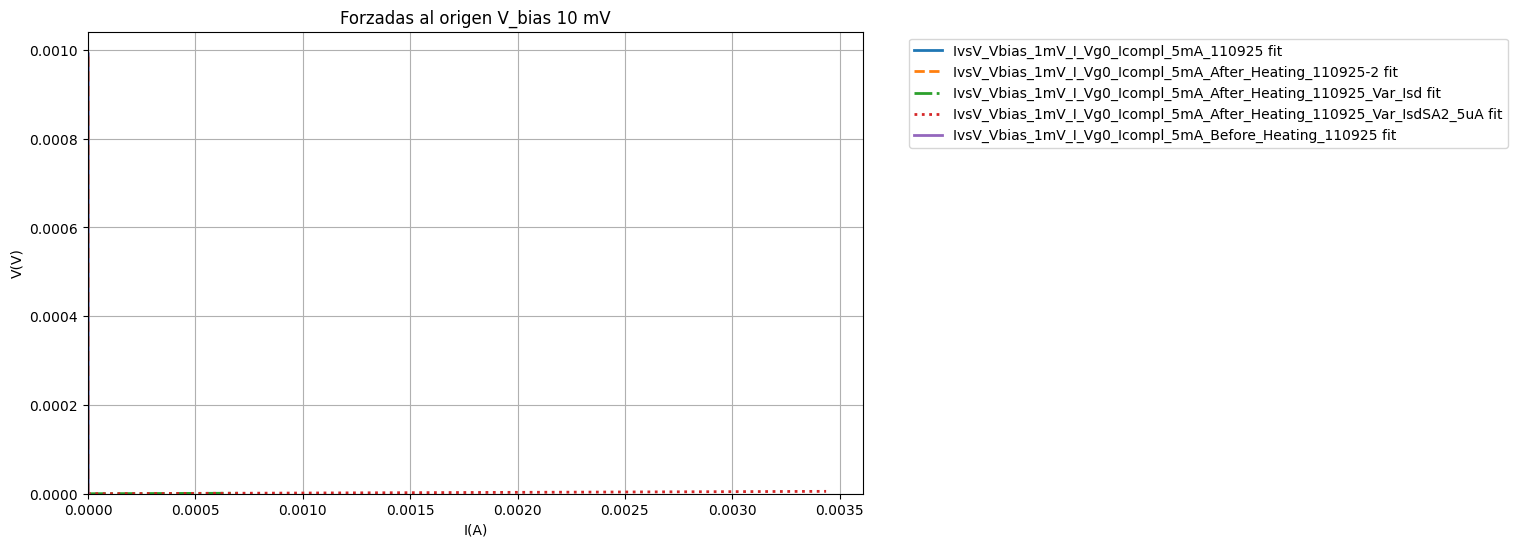


📊 Gráfica combinada guardada en: OFET RvsVg/IvsV/graficas/regresiones_forzadas_origen.png
📄 Archivo resumen guardado en: OFET RvsVg/IvsV/graficas/resultados_pendientes.csv


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from glob import glob
import itertools

# === CONFIGURACIÓN ===
carpeta_entrada = r"OFET RvsVg/IvsV"  # Cambia por tu ruta
carpeta_salida = os.path.join(carpeta_entrada, "graficas")

os.makedirs(carpeta_salida, exist_ok=True)

archivos = glob(os.path.join(carpeta_entrada, "*.txt"))
print(f"Se encontraron {len(archivos)} archivos.")

resultados = []

colores = itertools.cycle(plt.cm.tab10.colors)
estilos = itertools.cycle(["-", "--", "-.", ":"])

plt.figure(figsize=(10, 6))

for archivo in archivos:
    try:
        # Leer archivo
        df = pd.read_csv(archivo, sep="\t", header=None)

        # Extraer columnas 2 y 4
        x = pd.to_numeric(df.iloc[:, 1], errors='coerce')
        y = pd.to_numeric(df.iloc[:, 3], errors='coerce')

        # Eliminar NaN
        mask = ~np.isnan(x) & ~np.isnan(y)
        x = x[mask].values
        y = y[mask].values

        if len(x) < 3:
            print(f"Archivo {archivo} omitido (datos insuficientes).")
            continue

        # === Ajuste forzado al origen ===
        m = np.sum(x * y) / np.sum(x**2)

        # Error estándar de la pendiente
        residuals = y - m * x
        SE_m = np.sqrt(np.sum(residuals**2) / ((len(x) - 1) * np.sum(x**2)))

        # Guardar resultados
        nombre_base = os.path.splitext(os.path.basename(archivo))[0]
        resultados.append({
            "archivo": nombre_base,
            "pendiente": m,
            "error_pendiente": SE_m
        })

        # Recta ajustada (hasta donde llegan los datos)
        x_pred = np.linspace(0, x.max(), 100)
        y_pred = m * x_pred

        # Graficar solo la recta
        plt.plot(x_pred, y_pred, linestyle=next(estilos),
                 color=next(colores), linewidth=2,
                 label=f"{nombre_base} fit")

    except Exception as e:
        print(f"❌ Error procesando {archivo}: {e}")

# === Config final de la figura ===
plt.xlabel("I(A)")
plt.ylabel("V(V)")
plt.title("Forzadas al origen V_bias 10 mV")
plt.xlim(left=0)   # empieza en 0 en x
plt.ylim(bottom=0) # empieza en 0 en y
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

salida_combinada = os.path.join(carpeta_salida, "regresiones_forzadas_origen.png")
plt.savefig(salida_combinada, dpi=300, bbox_inches='tight')
plt.show()

print(f"\n📊 Gráfica combinada guardada en: {salida_combinada}")

# Guardar resultados en CSV
df_resultados = pd.DataFrame(resultados)
csv_resumen = os.path.join(carpeta_salida, "resultados_pendientes.csv")
df_resultados.to_csv(csv_resumen, index=False)

print(f"📄 Archivo resumen guardado en: {csv_resumen}")
